In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 
from scipy.stats import norm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

seed(47)

In [3]:
df = pd.read_excel('default of credit card clients.xls', skiprows=range(1))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
idx = 0
while idx<np.shape(df)[1]:
    df[df.columns[idx]].isna().value_counts()
    idx += 1

In [5]:
idx = 0
while idx<np.shape(df)[1]:
    print(df[df.columns[idx]].isnull().value_counts())
    idx += 1

False    30000
Name: ID, dtype: int64
False    30000
Name: LIMIT_BAL, dtype: int64
False    30000
Name: SEX, dtype: int64
False    30000
Name: EDUCATION, dtype: int64
False    30000
Name: MARRIAGE, dtype: int64
False    30000
Name: AGE, dtype: int64
False    30000
Name: PAY_0, dtype: int64
False    30000
Name: PAY_2, dtype: int64
False    30000
Name: PAY_3, dtype: int64
False    30000
Name: PAY_4, dtype: int64
False    30000
Name: PAY_5, dtype: int64
False    30000
Name: PAY_6, dtype: int64
False    30000
Name: BILL_AMT1, dtype: int64
False    30000
Name: BILL_AMT2, dtype: int64
False    30000
Name: BILL_AMT3, dtype: int64
False    30000
Name: BILL_AMT4, dtype: int64
False    30000
Name: BILL_AMT5, dtype: int64
False    30000
Name: BILL_AMT6, dtype: int64
False    30000
Name: PAY_AMT1, dtype: int64
False    30000
Name: PAY_AMT2, dtype: int64
False    30000
Name: PAY_AMT3, dtype: int64
False    30000
Name: PAY_AMT4, dtype: int64
False    30000
Name: PAY_AMT5, dtype: int64
False    30000

In [6]:
df.rename(columns={'LIMIT_BAL':'BAL'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

,ID,BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### FEATURE SELECTION 

In [7]:
payments = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

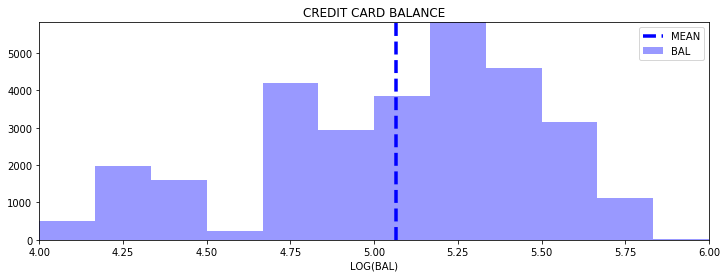

In [8]:
plt.figure(figsize=(12,4))
df['BAL'].apply(np.log10).hist(bins=12, color='blue', alpha=0.4, label='BAL')
bal_avg = np.mean(df['BAL'].apply(np.log10).values)
plt.axvline(bal_avg, linestyle='--', linewidth=3.5, color='blue', label='MEAN')
plt.legend()
plt.grid()
plt.xlabel('LOG(BAL)')
plt.title('CREDIT CARD BALANCE')
plt.autoscale(enable=True, tight=True)
plt.show()

In [9]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [10]:
np.round(df['SEX'].value_counts()[2]*100/df['SEX'].value_counts().sum()), np.round(df['SEX'].value_counts()[1]*100/df['SEX'].value_counts().sum())

(60.0, 40.0)

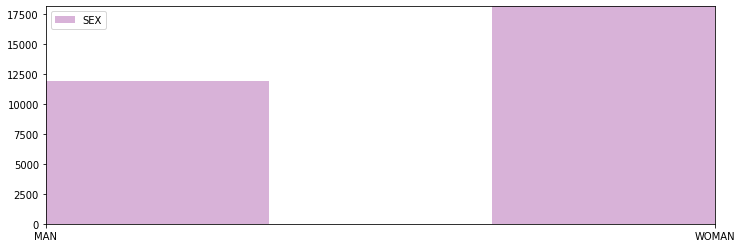

In [11]:
plt.figure(figsize=(12,4))
plt.hist(df['SEX'], bins=3, alpha=0.3, color='purple', label='SEX')
plt.xticks([1,2],('MAN', 'WOMAN'))
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.show()

In [12]:
df['EDUCATION'].value_counts()/df['EDUCATION'].value_counts().sum()

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

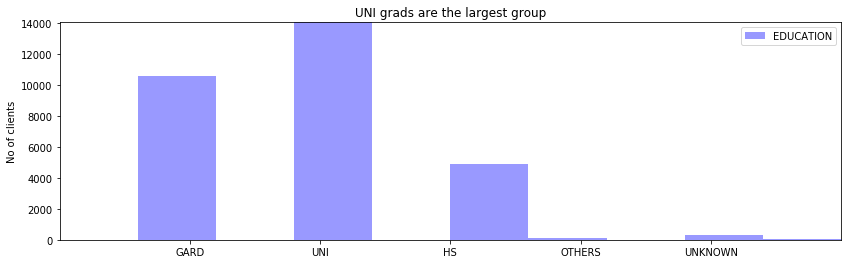

In [13]:
plt.figure(figsize=(14,4))
df['EDUCATION'].hist(color='blue', alpha=0.4, label=['EDUCATION'] )
plt.grid()
plt.legend()
plt.title('UNI grads are the largest group')
plt.xticks( [1,2,3,4,5], ('GARD','UNI','HS','OTHERS','UNKNOWN') )
plt.ylabel('No of clients')
plt.autoscale(enable=True, tight=True)
plt.show()

In [14]:
df['MARRIAGE'].value_counts()/df['MARRIAGE'].value_counts().sum()

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

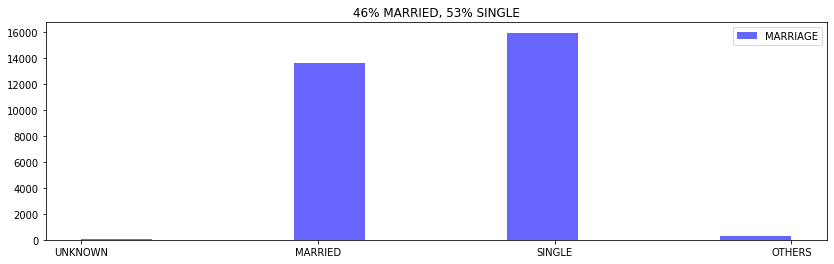

In [15]:
plt.figure(figsize=(14,4))
df['MARRIAGE'].hist(color='blue', alpha=0.6, label='MARRIAGE')
plt.xticks([1, 2, 3, 0], ('MARRIED', 'SINGLE', 'OTHERS', 'UNKNOWN'))
plt.autoscale(enable=True)
plt.legend()
plt.title('46% MARRIED, 53% SINGLE')
plt.grid()
plt.show()

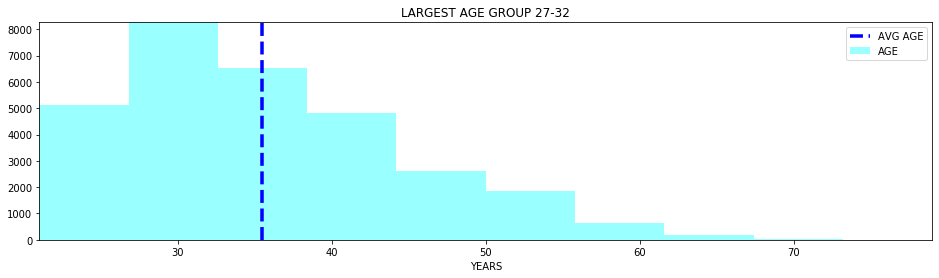

In [16]:
plt.figure(figsize=(16,4))
df['AGE'].hist(color='cyan', alpha=0.4, label='AGE')
plt.title('LARGEST AGE GROUP 27-32')
plt.axvline(df['AGE'].mean(), color='blue', linestyle='--', linewidth=3.5, label='AVG AGE')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.grid()
plt.xlabel('YEARS')
plt.show()

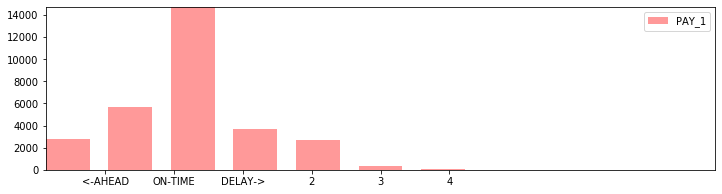

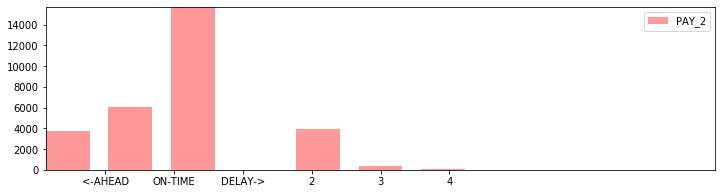

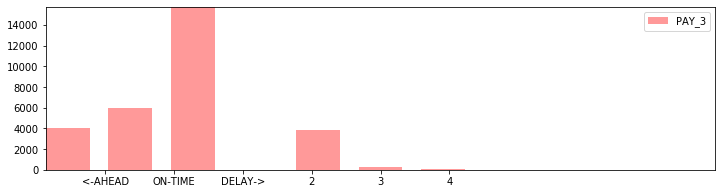

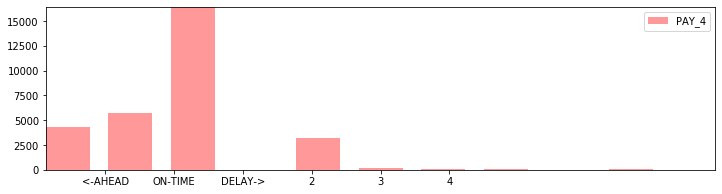

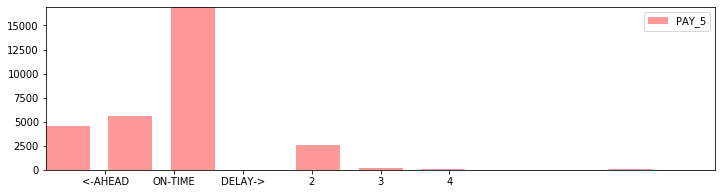

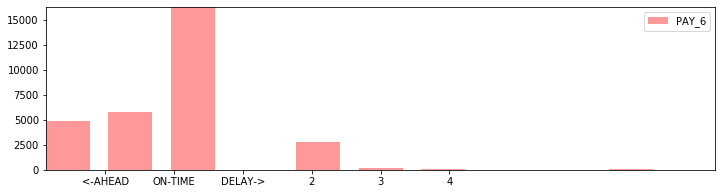

In [17]:
payments = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for pay in payments:
    plt.figure(figsize=(12,3))
    df[pay].hist(bins=11, color='red', alpha=0.4, rwidth=0.7, label=pay)
    plt.grid()
    plt.legend()
    plt.xticks([-2,-1,0,1,2,3,4], ('-2', '<-AHEAD', 'ON-TIME', 'DELAY->', '2', '3', '4'))
    plt.autoscale(tight=True, enable=True)
    plt.show()

## BINARY CLASSIFICATION

In [19]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

We would classify customers into two groups 

## (1) CREDITABLE CUSTOMER (CC)
## (2) NOT CREDITABLE CUSTOMER (NCC)

In [20]:
df[ payments ].head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [21]:
df[ payments ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
PAY_1    30000 non-null int64
PAY_2    30000 non-null int64
PAY_3    30000 non-null int64
PAY_4    30000 non-null int64
PAY_5    30000 non-null int64
PAY_6    30000 non-null int64
dtypes: int64(6)
memory usage: 1.4 MB


In [22]:
df[ payments ].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [23]:
df['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [25]:
binary_pay_records_CC = [] 
binary_pay_records_NCC = []
for pay in payments:
    print(df[pay].apply(lambda x:1 if (x<0) else 0).value_counts())
    creditable_customer = df[pay].apply(lambda x:1 if (x<0) else 0).value_counts()[0]/30000
    binary_pay_records_CC.append(creditable_customer)
    not_creditable_customer = df[pay].apply(lambda x:1 if (x<0) else 0).value_counts()[1]/30000
    binary_pay_records_NCC.append(not_creditable_customer)

0    21555
1     8445
Name: PAY_1, dtype: int64
0    20168
1     9832
Name: PAY_2, dtype: int64
0    19977
1    10023
Name: PAY_3, dtype: int64
0    19965
1    10035
Name: PAY_4, dtype: int64
0    19915
1    10085
Name: PAY_5, dtype: int64
0    19365
1    10635
Name: PAY_6, dtype: int64


In [26]:
binary_pay_records_CC

[0.7185, 0.6722666666666667, 0.6659, 0.6655, 0.6638333333333334, 0.6455]

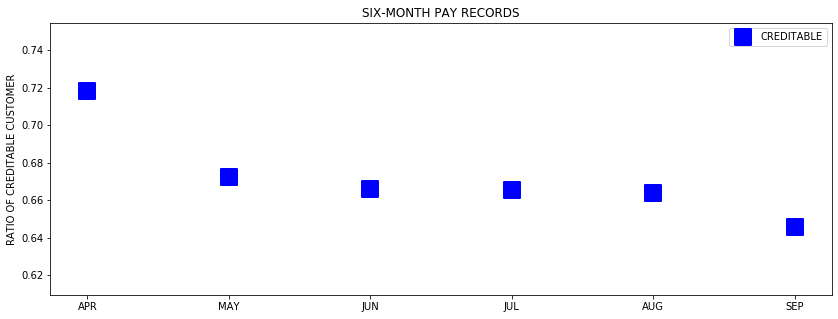

In [27]:
plt.figure(figsize=(14,5))
plt.scatter(np.arange(1,7,1),binary_pay_recors_CC, s=2**8, c='blue', marker='s',linewidths=2, label='CREDITABLE' )
#plt.scatter(np.arange(1,7,1),binary_pay_recors_NCC, s=2**8, c='green', marker='s',linewidths=2, label='NOT CREDITABLE' )
plt.legend()
plt.autoscale(enable=True)
plt.title('SIX-MONTH PAY RECORDS')
plt.ylabel('RATIO OF CREDITABLE CUSTOMER')
plt.xticks([1,2,3,4,5,6],('APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'))
plt.show()

In [28]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [30]:
binary_pay_records_edu = []  
for e in [2,1,3]:
    df_ = df[(df['EDUCATION']==e)]
    print(len(df_))
    P_R = []
    for pay in payments:
        creditable_customer = df_[pay].apply(lambda x:1 if (x<0) else 0).value_counts()[0]/30000
        P_R.append(creditable_customer)
    binary_pay_records_edu.append([P_R])

14030
10585
4917


In [32]:
np.shape(binary_pay_records_edu)

(3, 1, 6)

In [34]:
pay_uni = binary_pay_records_edu[0][0] # UNI
pay_grad = binary_pay_records_edu[1][0] # GRAD
pay_hs = binary_pay_records_edu[2][0] # HS

In [35]:
pay_uni

[0.3658,
 0.3502,
 0.34626666666666667,
 0.3432,
 0.33963333333333334,
 0.3310666666666667]

In [36]:
pay_edu = [pay_uni, pay_grad, pay_hs]

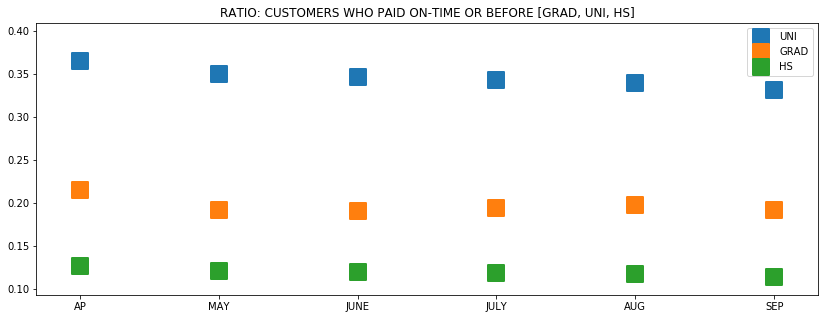

In [37]:
lab = ['UNI', 'GRAD', 'HS']
plt.figure(figsize=(14,5))
for p in range(0,3):
    plt.scatter(np.arange(1,7,1), pay_edu[p], label=lab[p],  s=2**8, marker='s',linewidths=2 )
    
plt.legend()
plt.title('RATIO: CUSTOMERS WHO PAID ON-TIME OR BEFORE [GRAD, UNI, HS]')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.show()

In [39]:
df['MARRIAGE'].value_counts(), df['MARRIAGE'].value_counts().index, df['MARRIAGE'].value_counts().values

(2    15964
 1    13659
 3      323
 0       54
 Name: MARRIAGE, dtype: int64,
 Int64Index([2, 1, 3, 0], dtype='int64'),
 array([15964, 13659,   323,    54]))

In [40]:
binary_pay_recors_ms = []  
for ms in [1,2,3]:
    df_ = df[(df['MARRIAGE']==ms)]
    #print(df_.head())
    print(len(df_))
    P_R = []
    for pay in payments:
        creditable_customer = df_[pay].apply(lambda x:1 if (x<0) else 0).value_counts()[0]/30000
        P_R.append(creditable_customer)
    binary_pay_recors_ms.append([P_R])

13659
15964
323


In [41]:
np.shape(binary_pay_recors_ms)

(3, 1, 6)

In [42]:
pay_married = binary_pay_recors_ms[0][0]
pay_married 

[0.31726666666666664,
 0.294,
 0.29123333333333334,
 0.2899,
 0.28936666666666666,
 0.2818333333333333]

In [43]:
pay_single = binary_pay_recors_ms[1][0]
pay_single 

[0.39126666666666665,
 0.36896666666666667,
 0.36543333333333333,
 0.3663666666666667,
 0.3653,
 0.3548]

In [44]:
pay_other = binary_pay_recors_ms[2][0]
pay_other

[0.0089,
 0.008266666666666667,
 0.008233333333333334,
 0.0083,
 0.008133333333333333,
 0.007933333333333334]

In [45]:
pay_records_ms = [pay_married, pay_single, pay_other]

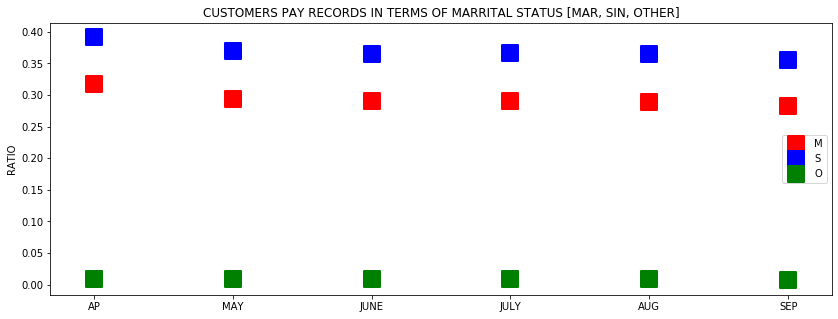

In [46]:
colr = ['red', 'blue', 'green']
lab_ = ['M', 'S', 'O']
plt.figure(figsize=(14,5))
for p in range(0,3):
    plt.scatter(np.arange(1,7,1),pay_records_ms[p], label=lab_[p], color=colr[p],  s=2**8,marker='s',linewidths=2 )
    
plt.legend('MSO')
plt.ylabel('RATIO')
plt.title('CUSTOMERS PAY RECORDS IN TERMS OF MARRITAL STATUS [MAR, SIN, OTHER]')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.show()

### CLASSIFICATION: PAY STATUS
#### AGE

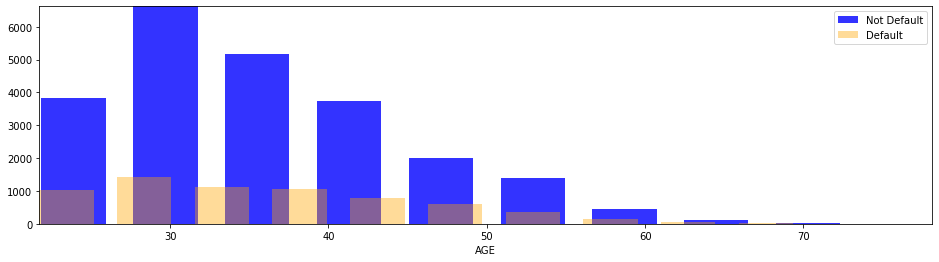

In [52]:
plt.figure(figsize=(16,4))
df_nd = df[df['default payment next month']==0]
df_d = df[df['default payment next month']==1]
df_nd['AGE'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='Not Default')
df_d['AGE'].hist(bins=11, alpha=0.4, color='orange', rwidth=0.7, label='Default')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.xlabel('AGE')
plt.grid()
plt.show()

#### BALANCE

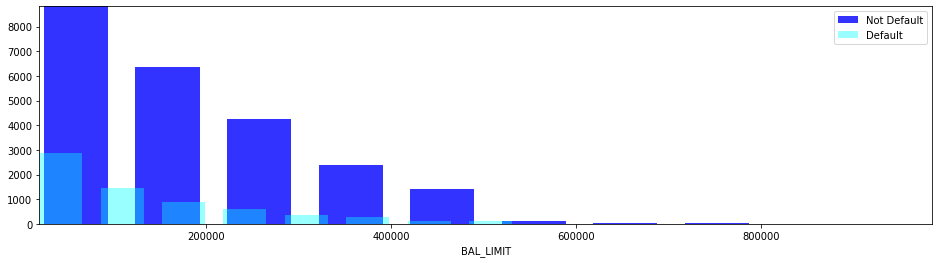

In [53]:
plt.figure(figsize=(16,4))
df_nd['BAL'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='Not Default')
df_d['BAL'].hist(bins=11, alpha=0.4, color='cyan', rwidth=0.7, label='Default')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.xlabel('BAL_LIMIT')
plt.grid()
plt.show()

#### EDUCATION

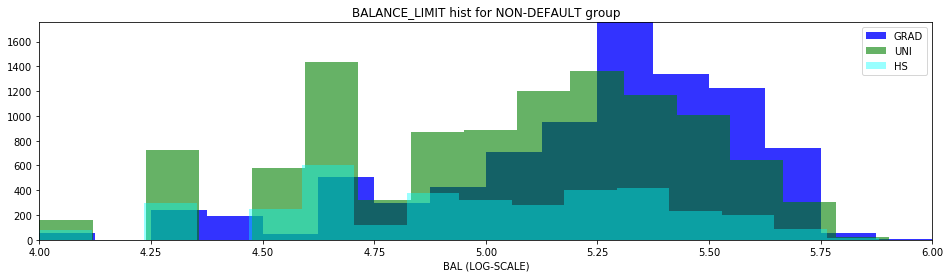

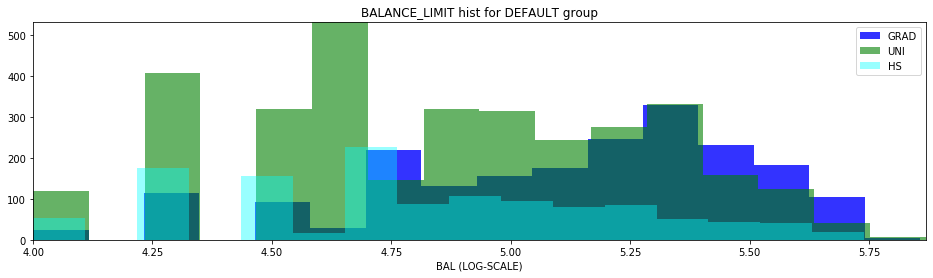

In [54]:
edu1 = df_nd[df_nd['EDUCATION']==1]; edu2 = df_nd[df_nd['EDUCATION']==2]; edu3 = df_nd[df_nd['EDUCATION']==3]
plt.figure(figsize=(16,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='blue', label='GRAD')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='green', label='UNI')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='cyan', label='HS')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for NON-DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

edu1 = df_d[df_d['EDUCATION']==1]; edu2 = df_d[df_d['EDUCATION']==2]; edu3 = df_d[df_d['EDUCATION']==3]
plt.figure(figsize=(16,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='blue', label='GRAD')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='green', label='UNI')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='cyan', label='HS')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

#### MARRITAL STATUS

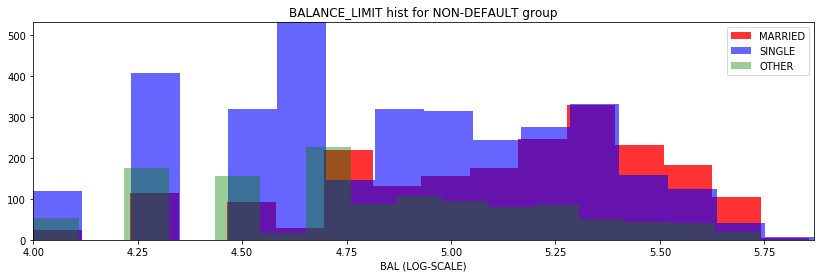

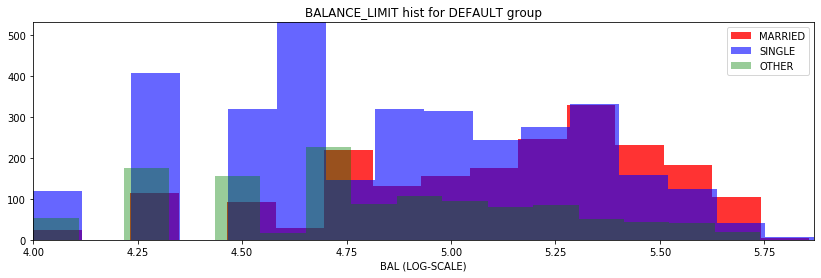

In [55]:
msta1 = df_nd[df_nd['MARRIAGE']==1]; msta12 = df_nd[df_nd['MARRIAGE']==2]; msta13 = df_nd[df_nd['MARRIAGE']==3]
plt.figure(figsize=(14,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='red', label='MARRIED')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='blue', label='SINGLE')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='green', label='OTHER')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for NON-DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

msta1 = df_d[df_d['MARRIAGE']==1]; msta12 = df_d[df_d['MARRIAGE']==2]; msta13 = df_d[df_d['MARRIAGE']==3]
plt.figure(figsize=(14,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='red', label='MARRIED')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='blue', label='SINGLE')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='green', label='OTHER')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

#### AGE

### INFERENTIAL STATISTICS

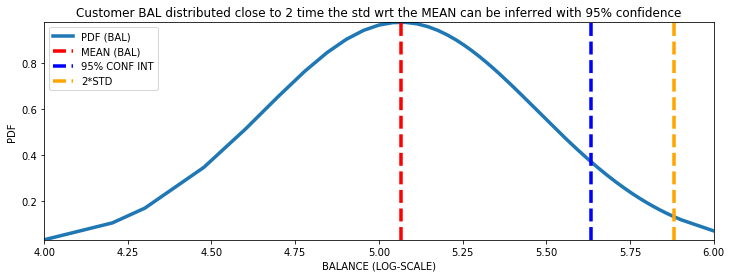

In [56]:
bal = np.sort(df['BAL'].apply(np.log10).values)
bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
plt.figure(figsize=(12,4))
plt.plot(bal, bal_pdf, label='PDF (BAL)',linewidth=3.5)
plt.axvline(np.mean(bal), linestyle='--', color='red', label='MEAN (BAL)', linewidth=3.5)
plt.axvline(np.percentile(bal, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
plt.axvline(np.mean(bal)+2*np.std(bal), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('Customer BAL distributed close to 2 time the std wrt the MEAN can be inferred with 95% confidence')
plt.xlabel('BALANCE (LOG-SCALE)')
plt.ylabel('PDF')
plt.show()

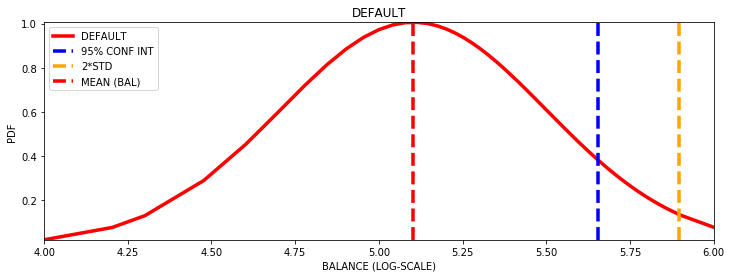

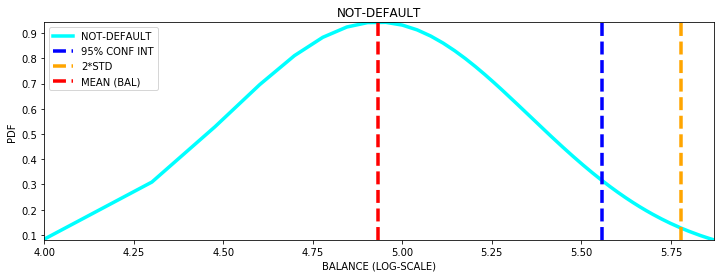

In [57]:
colr = ['red', 'cyan']
titles = ['DEFAULT', 'NOT-DEFAULT']
list_def = [df_nd, df_d]
idx = 0

for gr in list_def:
    bal = np.sort(gr['BAL'].apply(np.log10).values)
    bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
    bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
    plt.figure(figsize=(12,4))
    plt.plot(bal, bal_pdf, label=titles[idx], color=colr[idx],linewidth=3.5)
    plt.axvline(np.percentile(bal, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
    plt.axvline(np.mean(bal)+2*np.std(bal), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
    plt.axvline(np.mean(bal), linestyle='--', color='red', label='MEAN (BAL)', linewidth=3.5)
    plt.autoscale(enable=True, tight=True)
    plt.legend()
    plt.title(titles[idx])
    plt.xlabel('BALANCE (LOG-SCALE)')
    plt.ylabel('PDF')
    idx += 1

#### education

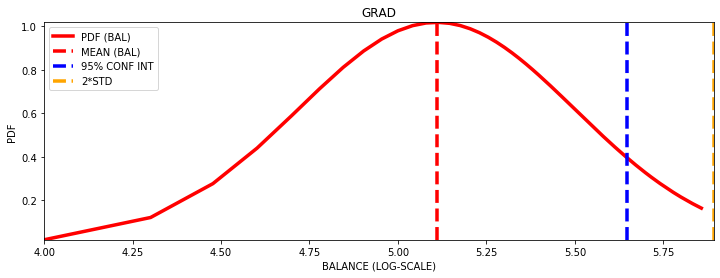

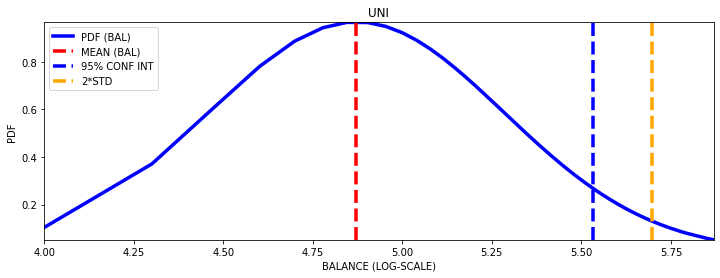

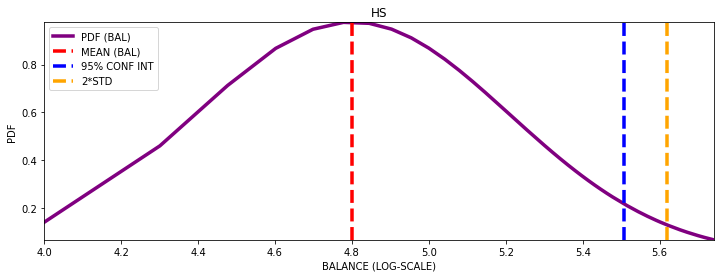

In [58]:
colr = ['red', 'blue', 'purple']
titles = ['GRAD', 'UNI', 'HS']
list_edu = [edu1, edu2, edu3]
idx = 0
for edu in list_edu:
    bal = np.sort(edu['BAL'].apply(np.log10).values)
    bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
    bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
    plt.figure(figsize=(12,4))
    plt.plot(bal, bal_pdf, label='PDF (BAL)', color=colr[idx],linewidth=3.5)
    plt.axvline(np.mean(bal), linestyle='--', color='red', label='MEAN (BAL)',linewidth=3.5)
    plt.axvline(np.percentile(bal, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
    plt.axvline(np.mean(bal)+2*np.std(bal), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
    plt.autoscale(enable=True, tight=True)
    plt.legend()
    plt.title(titles[idx])
    plt.xlabel('BALANCE (LOG-SCALE)')
    plt.ylabel('PDF')
    idx += 1

#### Hypothesis:

In [59]:
ttest_ind(df_nd['BAL'].values, df_d['BAL'].values, equal_var=False)

Ttest_indResult(statistic=28.951587933509845, pvalue=3.3641002455114717e-178)

In [60]:
df_GR = df[df['EDUCATION']==1];df_U = df[df['EDUCATION']==2];df_HS = df[df['EDUCATION']==3]
ttest_ind(df_GR['BAL'].values, df_U['BAL'].values, equal_var=False),ttest_ind(df_GR['BAL'].values, df_HS['BAL'].values, equal_var=False), ttest_ind(df_U['BAL'].values, df_HS['BAL'].values, equal_var=False)

(Ttest_indResult(statistic=39.57867154935797, pvalue=0.0),
 Ttest_indResult(statistic=41.3050193831098, pvalue=0.0),
 Ttest_indResult(statistic=10.692676069537066, pvalue=1.5857820246089056e-26))

### FEATURE CORRELATION

#### TIME BASED PAY RECORDS

In [61]:
pay = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
corr_pay = df[pay].corr()
corr_pay

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
PAY_1,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553
PAY_2,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501
PAY_3,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684
PAY_4,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449
PAY_5,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900
PAY_6,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000


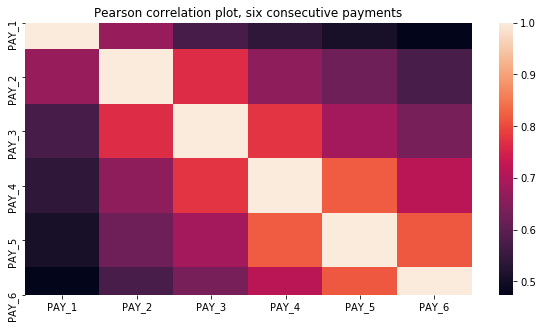

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_pay, vmin=np.min(np.min(corr_pay)), vmax=1)
plt.title('Pearson correlation plot, six consecutive payments')
plt.show()

#### BILL AMOUNT 

           BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
BILL_AMT1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650
BILL_AMT2   0.951484   1.000000   0.928326   0.892482   0.859778   0.831594
BILL_AMT3   0.892279   0.928326   1.000000   0.923969   0.883910   0.853320
BILL_AMT4   0.860272   0.892482   0.923969   1.000000   0.940134   0.900941
BILL_AMT5   0.829779   0.859778   0.883910   0.940134   1.000000   0.946197
BILL_AMT6   0.802650   0.831594   0.853320   0.900941   0.946197   1.000000


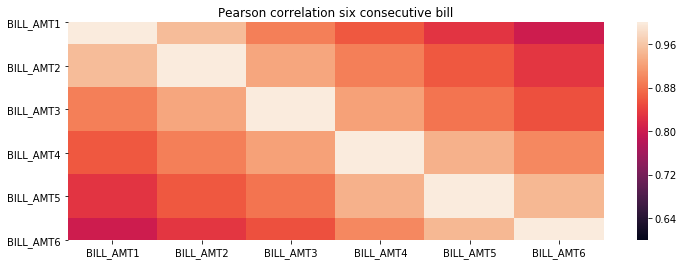

In [63]:
bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
corr_bill = df[bill].corr()
print(corr_bill)
plt.figure(figsize=(12,4))
sns.heatmap(corr_bill, vmin=0.6, vmax=1 )
plt.title('Pearson correlation six consecutive bill')
plt.show()

#### PAY AMOUNT

          PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
PAY_AMT1  1.000000  0.285576  0.252191  0.199558  0.148459  0.185735
PAY_AMT2  0.285576  1.000000  0.244770  0.180107  0.180908  0.157634
PAY_AMT3  0.252191  0.244770  1.000000  0.216325  0.159214  0.162740
PAY_AMT4  0.199558  0.180107  0.216325  1.000000  0.151830  0.157834
PAY_AMT5  0.148459  0.180908  0.159214  0.151830  1.000000  0.154896
PAY_AMT6  0.185735  0.157634  0.162740  0.157834  0.154896  1.000000


<function matplotlib.pyplot.show(*args, **kw)>

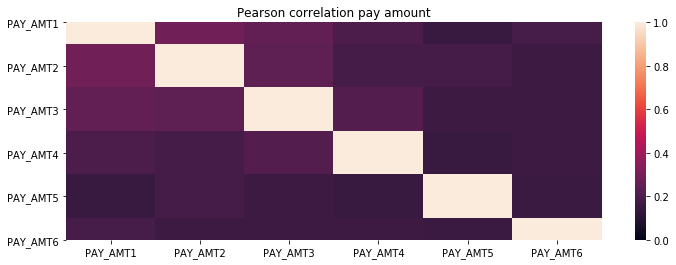

In [64]:
pay_amt = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr_pay_amt = df[pay_amt].corr()
print(corr_pay_amt)
plt.figure(figsize=(12,4))
sns.heatmap(corr_pay_amt, vmin=0, vmax=1)
plt.title('Pearson correlation pay amount')
plt.show

### PREDICTION: MACHINE LEARNING

In [65]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### LogisticRegression

In [66]:
PAY = []
for idx in range(6): 
    for j in range(len(df)): 
        if (df[str(df.columns[idx+11])].iloc[j]) <= (df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(1)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.75*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(2)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.50*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(3)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.25*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(4)
        else:
            PAY.append(5)

In [67]:
payr = np.array(PAY).reshape(6, len(df))
payr[:,0:10]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 1],
       [5, 5, 5, 5, 1, 5, 5, 1, 5, 1],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 1],
       [1, 5, 5, 5, 5, 5, 5, 1, 5, 1],
       [1, 5, 5, 5, 5, 5, 5, 1, 5, 5]])

In [68]:
col = ['PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6']
for idx in range(6):
    df[col[idx]] = payr[idx,:]

In [69]:
df.head()

,ID,BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY-FE-1,PAY-FE-2,PAY-FE-3,PAY-FE-4,PAY-FE-5,PAY-FE-6
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,1,5,5,5,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,1,5,5,5,5,5
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,1,5,5,5,5,5
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,1,5,5,5,5,5
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,1,5,1,5,5,5


In [70]:
df['PAY-FE-1'].value_counts()

1    29340
5      624
4       23
3       13
Name: PAY-FE-1, dtype: int64

In [71]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3',
       'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6'],
      dtype='object')

In [72]:
#col_PA = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6']

In [73]:
df['BAL'] = df['BAL'].apply(np.log10)

In [74]:
col_PA = ['BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6']


In [75]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
x_tr, x_t, y_tr, y_t = train_test_split( df[col_PA].values, (df['default payment next month']).values)
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
y_tr_p = lr.predict(x_tr)

In [77]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.8076,0.370693,0.678914,0.254949,0.610245


In [78]:
accu = accuracy_score(y_tr, y_tr_p)
f1 = f1_score(y_tr, y_tr_p)
prece = precision_score(y_tr, y_tr_p)
recal = recall_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.807378,0.361896,0.674163,0.247333,0.606725


### Gaussian Naive Bayes

In [79]:
gnb = GaussianNB()
gnb.fit(x_tr, y_tr)
y_p = gnb.predict(x_t)
y_tr_p = gnb.predict(x_tr)


In [80]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['GaussianNB', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ML Model', accu, f1, prece, recal, roc]], columns= matric_n )

,GaussianNB,accuracy_,f1_,precision_,recall,ROC
0,ML Model,0.8012,0.496454,0.568006,0.440912,0.672539


### Decision Tree Classifier

In [81]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_p = dtc.predict(x_t)
y_tr_p = dtc.predict(x_tr)

In [82]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['DecisionTreeClassifier', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ML Model', accu, f1, prece, recal, roc]], columns= matric_n )

,DecisionTreeClassifier,accuracy_,f1_,precision_,recall,ROC
0,ML Model,0.736533,0.404461,0.40642,0.402519,0.617255


### ExtraTreesClassifier

In [83]:
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_h = clf_extree.predict(x_t)
y_tr_h = clf_extree.predict(x_tr)


In [84]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ExtraTreesClassifier', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ML Model', accu, f1, prece, recal, roc]], columns= matric_n )

,ExtraTreesClassifier,accuracy_,f1_,precision_,recall,ROC
0,ML Model,0.736533,0.404461,0.40642,0.402519,0.617255


### Random forest Classifier

In [85]:
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)


accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['RandomForestClassifier', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ML Model', accu, f1, prece, recal, roc]], columns= matric_n )

,RandomForestClassifier,accuracy_,f1_,precision_,recall,ROC
0,ML Model,0.7916,0.42346,0.549808,0.344331,0.631878


### ensemble.GradientBoostClassifier

In [86]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))

Accuracy score over the test set 0.82
Accuracy score over the training set 0.83


### Best score based on cross-validation

In [87]:
MLclf = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    roc_list.append(roc_auc_score(y_t, y_p))
    

### GRID SEARCH 

In [88]:
test_sizee = np.arange(0.20, 0.45, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(df[col_PA].values,(df['default payment next month']).values, test_size=t_size)
        lr = GaussianNB() #LogisticRegression()
        lr.fit(x_tr, y_tr)
        y_p = lr.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))

In [89]:
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]

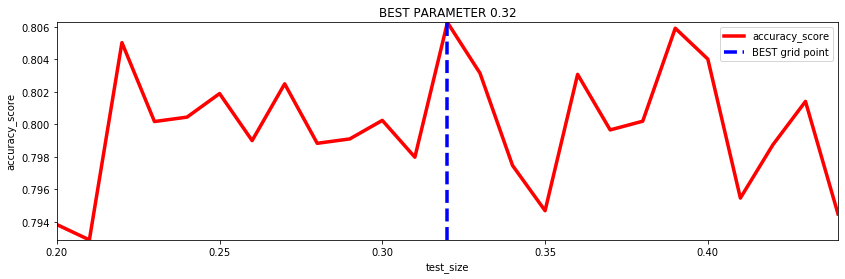

In [90]:
plt.figure(figsize=(14,4))
plt.plot(test_sizee,scores, color='red', linewidth=3.5, label='accuracy_score')
plt.axvline(test_sizee[ret_max(scores)[1]], linestyle='--', color='blue', linewidth=3.5, label='BEST grid point')
plt.autoscale(tight=True, enable=True)
plt.legend()
plt.title('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
plt.xlabel('test_size')
plt.ylabel('accuracy_score')
plt.show()

### CROSS-VALIDATION with best grid parameter

In [91]:
x_tr, x_t, y_tr, y_t = train_test_split( df[col_PA].values, (df['default payment next month']).values, test_size=test_sizee[ret_max(scores)[1]])


In [92]:
MLclf = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    roc_list.append(roc_auc_score(y_t, y_p))

In [93]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx
        
print('The best classifier from default parameter :', MLclf[best_roc_idx], '\n', 'with roc_auc_score : ', best_roc)       

The best classifier from default parameter : GaussianNB(priors=None, var_smoothing=1e-09) 
 with roc_auc_score :  0.6667457401237505


### Grid Search
#### Random Forest Classifier

In [94]:
df['BAL'] = df['BAL']/1000000.00
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BAL']
x_tr, x_t, y_tr, y_t = train_test_split(df[cols], df['default payment next month'], test_size=test_sizee[ret_max(scores)[1]], random_state=100)

In [95]:
clf = RandomForestClassifier(max_depth=8)
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)
print('accuracy score for the test set %0.2f' %accuracy_score(y_t, y_p))
print('roc_auc_score for the test set %0.2f' %roc_auc_score(y_t, y_p))

accuracy score for the test set 0.82
roc_auc_score for the test set 0.66


In [96]:
depth_grid = [2, 3, 4, 5, 6, 7, 8, 9]
for d in depth_grid:
    clf = RandomForestClassifier(max_depth=d, random_state=0)
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)
    print('max_depth = ', d, ' , ', 'ROC score : %0.2f' %np.round(roc_auc_score(y_t, y_p), 2) )

max_depth =  2  ,  ROC score : 0.60
max_depth =  3  ,  ROC score : 0.63
max_depth =  4  ,  ROC score : 0.64
max_depth =  5  ,  ROC score : 0.65
max_depth =  6  ,  ROC score : 0.66
max_depth =  7  ,  ROC score : 0.67
max_depth =  8  ,  ROC score : 0.66
max_depth =  9  ,  ROC score : 0.66


In [97]:
for rs in range(10):
    clf = RandomForestClassifier(max_depth=7)
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)                     

In [98]:
depth_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [99]:
def ret_score(max_depth):
    score = 0
    for rs in range(10):
        clf = RandomForestClassifier(max_depth)
        clf.fit(x_tr, y_tr)
        y_p = clf.predict(x_t)
        score += accuracy_score(y_t, y_p)
    return score/10

In [100]:
score_d = []
for depth in depth_grid:
    score_d.append(ret_score(max_depth=depth))
    print('Tree depth =', depth, '  ', 'ROC Score: %0.4f' %np.round(ret_score(max_depth=depth),4))

Tree depth = 2    ROC Score: 0.7735
Tree depth = 3    ROC Score: 0.7720
Tree depth = 4    ROC Score: 0.7822
Tree depth = 5    ROC Score: 0.7805
Tree depth = 6    ROC Score: 0.7849
Tree depth = 7    ROC Score: 0.7862
Tree depth = 8    ROC Score: 0.7888
Tree depth = 9    ROC Score: 0.7871
Tree depth = 10    ROC Score: 0.7909
Tree depth = 11    ROC Score: 0.7910
Tree depth = 12    ROC Score: 0.7907
Tree depth = 13    ROC Score: 0.7915
Tree depth = 14    ROC Score: 0.7923
Tree depth = 15    ROC Score: 0.7927


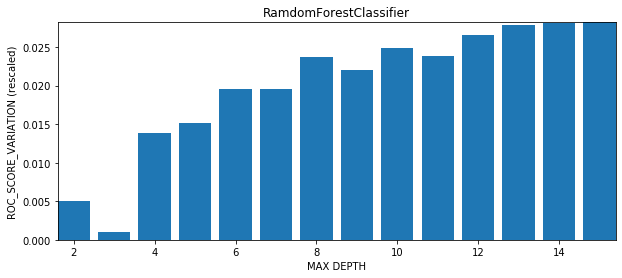

In [101]:
plt.figure(figsize=(10,4))
plt.bar(depth_grid, np.abs(np.log(score_d)-np.min(np.log(score_d)))+0.001)
plt.autoscale(enable=True, tight=True)
plt.title('RamdomForestClassifier')
plt.ylabel('ROC_SCORE_VARIATION (rescaled)')
plt.xlabel('MAX DEPTH')
plt.show()

## ML in Depth Analysis 

#### LogisticRegression 

In [126]:
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [127]:
x_tr, x_t, y_tr, y_t = train_test_split(df[cols], df['default payment next month'], test_size=0.4)
clf = LogisticRegression()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.81375,0.345151,0.718293,0.22715,0.601297


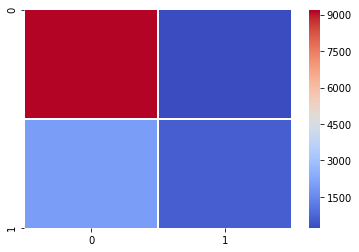

In [128]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_v = ['LogisticRegression', accu, f1, prece, recal, roc]
matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']

cmatrix = confusion_matrix(y_t, y_p)
sns.heatmap(cmatrix, cbar=True, square=False, linewidth=1.0, cmap='coolwarm')

pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )


#### DecisionTreeClassifier

In [132]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_t = dtc.predict(x_t)
print( ' Accuracy score : ', accuracy_score(y_t, y_p), ', ROC score', roc_auc_score(y_t, y_p))

 Accuracy score :  0.9060833333333334 , ROC score 0.8473037508885637


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,DecisionTreeClassifier,0.906083,0.662878,0.581933,0.769979,0.847304


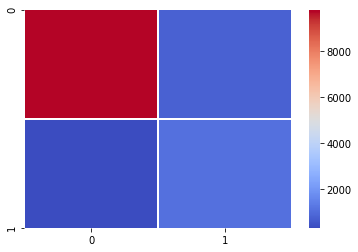

In [134]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_v = ['DecisionTreeClassifier', accu, f1, prece, recal, roc]
matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']

cmatrix = confusion_matrix(y_t, y_p)
sns.heatmap(cmatrix, cbar=True, square=False, linewidth=1.0, cmap='coolwarm')

pd.DataFrame( [['DecisionTreeClassifier', accu, f1, prece, recal, roc]], columns= matric_n )


#### ExtraTreesClassifier

In [135]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_p = clf_extree.predict(x_t)

In [136]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ExtraTreesClassifier', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,ExtraTreesClassifier,0.993667,0.973538,0.975576,0.971508,0.984097


In [137]:
y_tr_p = clf_extree.predict(x_tr)
accu = accuracy_score(y_tr, y_tr_p)
f1 = f1_score(y_tr, y_tr_p)
prece = precision_score(y_tr, y_tr_p)
recal = recall_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ExtraTreesClassifier', accu, f1, prece, recal, roc]], columns= matric_n )


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,ExtraTreesClassifier,0.830444,0.507742,0.729717,0.389315,0.673772


#### RandomForestClassifier 

In [138]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [139]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['RandomForestClassifier', accu, f1, prece, recal, roc]], columns= matric_n )


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,RandomForestClassifier,0.98725,0.947835,0.930388,0.965949,0.978051


In [140]:
y_tr_p = clf.predict(x_tr)
accu = accuracy_score(y_tr, y_tr_p)
f1 = f1_score(y_tr, y_tr_p)
prece = precision_score(y_tr, y_tr_p)
recal = recall_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['RandomForestClassifier', accu, f1, prece, recal, roc]], columns= matric_n )


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,RandomForestClassifier,0.829944,0.516047,0.715162,0.403661,0.678545


#### GradientBoostingClassifier 

In [141]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
accuracy_score(y_t, y_p), roc_auc_score(y_t, y_p)

(0.9741666666666666, 0.9346031615264812)

In [142]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['GradientBoostingClassifier', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,GradientBoostingClassifier,0.974167,0.891228,0.900071,0.882557,0.934603


In [143]:
y_tr_p = clf.predict(x_tr)
accu = accuracy_score(y_tr, y_tr_p)
f1 = f1_score(y_tr, y_tr_p)
prece = precision_score(y_tr, y_tr_p)
recal = recall_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.820667,0.480695,0.687529,0.369528,0.660439


### RECEIVER OPERATING CHARACTERSTIC (ROC)

ROC curve is a graphical plot that illustrates the performance of a binary classifier system as its 
discrimination threshold is verified.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.


### CROSS VALIDATION 

In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Text(0, 0.5, 'True Positive Rate')

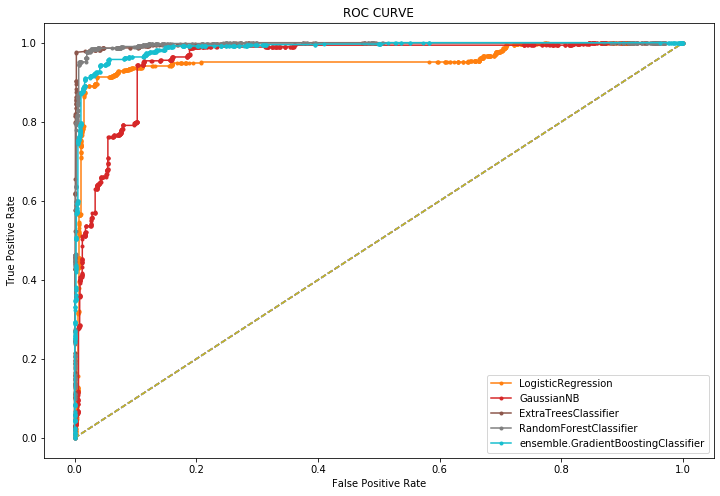

In [148]:
idx = 0
plt.figure(figsize=(12,8))
ns_probs = [0 for _ in range(len(y_t))] # no skill prediction 
MLclf = [LogisticRegression(), GaussianNB(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
lablist = ['LogisticRegression' , 'GaussianNB', 'ExtraTreesClassifier','RandomForestClassifier','ensemble.GradientBoostingClassifier']
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    clf_probs = clf.predict_proba(x_t)
    clf_probs = clf_probs[:, 1]
    ns_auc = roc_auc_score(y_t, ns_probs)
    clf_auc = roc_auc_score(y_t, clf_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_t, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_t, clf_probs) 
    lab_p = lablist[idx] 
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=lab_p ) 
    pyplot.legend()
    idx += 1
    roc_list.append(roc_auc_score(y_t, y_p))
    

plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [158]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx

print('The best classifier from default parameter : ExtraTreesClassifier', '\n', 'with roc_auc_score : ', best_roc)
MLclf[best_roc_idx]    

The best classifier from default parameter : ExtraTreesClassifier 
 with roc_auc_score :  0.9863237688799422


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [159]:
help(ExtraTreesClassifier)

Help on class ExtraTreesClassifier in module sklearn.ensemble.forest:

class ExtraTreesClassifier(ForestClassifier)
 |  ExtraTreesClassifier(n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  An extra-trees classifier.
 |  
 |  This class implements a meta estimator that fits a number of
 |  randomized decision trees (a.k.a. extra-trees) on various sub-samples
 |  of the dataset and uses averaging to improve the predictive accuracy
 |  and control over-fitting.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.20
 |         The default

### GRID SEARCH FOR ExtraTreesClassifier 

In [ ]:
# n_estimators, The number of trees in the forest (default = 10) 
# max_depth : integer or None, optional (default=None)

In [160]:
clf = ExtraTreesClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
roc_auc_score(y_t, y_p)

0.9846811393013183

In [178]:
roc_list = []
for tree in range(3,15):
    clf = ExtraTreesClassifier(n_estimators=tree)
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)
    score = roc_auc_score(y_t, y_p)
    roc_list.append(score)
    print(tree, ', ', score)
    

3 ,  0.9856288418472807
4 ,  0.9864658008844872
5 ,  0.9892615645208594
6 ,  0.98509200232489
7 ,  0.9837182037652924
8 ,  0.9880137424600812
9 ,  0.9875081914334798
10 ,  0.9878083109482955
11 ,  0.9852340343294349
12 ,  0.9872080719186639
13 ,  0.9871767834228747
14 ,  0.9870660399141188


In [180]:
for depth in range(4,14):
    clf = ExtraTreesClassifier(max_depth=depth, n_estimators=8)
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)
    score = roc_auc_score(y_t, y_p)
    roc_list.append(score)
    print(depth, ', ', score)

4 ,  0.719492778937598
5 ,  0.7308973205005975
6 ,  0.9238486705416146
7 ,  0.802224496898425
8 ,  0.9242644686591595
9 ,  0.9027810175755805
10 ,  0.8771786383601959
11 ,  0.8780757068419947
12 ,  0.9648975319858246
13 ,  0.9676603620950829
